<a href="https://colab.research.google.com/github/Sam-Law1/Portfolia-updated/blob/main/SamanthalawPORTFOLIO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PORTFOLIO**
# Task 2

**Pacific SST Principle Component Analysis and Local Forecasts**

1.1. Analyse both the 2D (latitude, longitude, time) data from the global Sea Surface Temperature (SST) data set used in the Week 4 Lab session and the entire set of years available from the  Pacific Sea Level Monitoring Project for the location you used in Task  1 (i.e. you will need to download more years). Discuss the differences in data provenance and compare the sea water temperature data gathered in situ to the values of the 2D data set at the nearest available data point.




Before we analyse anything we set up the environments and bring in the data sets. 

In [2]:
# import libraries
import pandas as pd
import xarray as xr

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline


**Data set 1: SST data**

We are using a small dataset that has been prepared and stored in Github showing the values for the sea water temperature inferred at the sea surface in degrees celsius averaged for each month from 1960 till 2016. 

The below code brings in the data and shows the summary of the xarray data using the bash command.


In [6]:
%%bash
# Mounting requires a special 'bash' command
#mounting the data from github, this is copying whats in the github directory into this folder
git clone https://github.com/pangeo-data/tutorial-data.git

Cloning into 'tutorial-data'...


In [7]:
ds_all = xr.open_mfdataset('./tutorial-data/sst/*nc', combine='by_coords') #showing metadata of the dataset
ds_all

,Array,Chunk
Bytes,43.83 MB,768.96 kB
Shape,"(684, 89, 180)","(12, 89, 180)"
Count,171 Tasks,57 Chunks
Type,float32,numpy.ndarray


We have to set this data up to be able to be analysed.

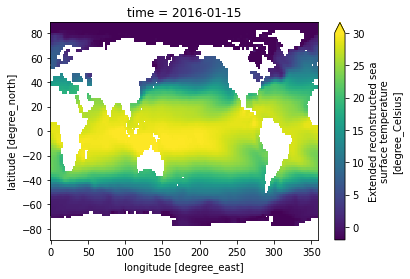

In [8]:
#set up a variable for the SST data
sst = ds_all.sst
# visualise the data for 2016
sst.sel(time='2016-01-15').plot(vmin=-2, vmax=30)

**Dataset 2: Weather conditions for Vanuatu**

This data is an hourly record of Water temp, air temp and sea level for the years of 1993 till 2020. It was downloaded from http://www.bom.gov.au/oceanography/projects/spslcmp/data/index.shtml as seperate excel documents for each year. Certian documents were then uploaded to Github for analysis against SST data. Noting that the SST data is only from 1960 till 2016 only some years between these two were selected to be able to appropriately compare. 

In [76]:
# Define the URL where the data set is stored 
Y1999_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_1999.csv'       #From Github 
Y2005_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_2005.csv'
Y2008_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_2008.csv'
Y2013_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_2013.csv'
Y2016_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_2016.csv'
Y1996_url = 'https://raw.githubusercontent.com/Sam-Law1/Portfolia-updated/main/IDO70009_1996.csv'
# Import the data set as a Pandas Dataframe using the 'read_csv' function
TableA1999 = pd.read_csv(Y1999_url)
TableA2005 = pd.read_csv(Y2005_url)
TableA2008 = pd.read_csv(Y2008_url)
TableA2013 = pd.read_csv(Y2013_url)
TableA2016 = pd.read_csv(Y2016_url)
TableA1996 = pd.read_csv(Y1996_url)
#display year 1999
pd.set_option('display.max_rows', 100) # This is to show more than a few rows
display(TableA1999) 
#display year 2020
pd.set_option('display.max_rows', 100) # This is to show more than a few rows
display(TableA2016) 

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Vanuatu
0,01-Jan-1999 00:00,0.534,29.7,29.3,1008.7,-0.113,-0.154,262,4.7,2.0,NaN
1,01-Jan-1999 01:00,0.619,29.7,29.7,1008.2,-0.121,-0.167,260,5.0,1.6,NaN
2,01-Jan-1999 02:00,0.797,29.8,29.8,1007.9,-0.136,-0.187,176,4.8,1.0,NaN
3,01-Jan-1999 03:00,1.021,29.6,29.2,1007.6,-0.155,-0.208,197,4.9,0.8,NaN
4,01-Jan-1999 04:00,1.238,29.5,29.0,1007.1,-0.158,-0.215,52,3.7,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,31-Dec-1999 19:00,0.761,28.6,24.1,1006.5,-0.012,-0.085,140,1.1,0.0,NaN
8756,31-Dec-1999 20:00,0.694,28.6,26.4,1007.2,-0.006,-0.071,2,0.8,0.0,NaN
8757,31-Dec-1999 21:00,0.675,28.4,27.6,1007.2,-0.008,-0.068,56,3.9,2.6,NaN
8758,31-Dec-1999 22:00,0.718,28.8,28.1,1007.3,-0.016,-0.076,44,5.2,0.9,NaN


,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Vanuatu
0,01-Jan-2016 00:00,1.342,28.4,29.9,1006.1,0.067,0.001,256,5.2,1.9,NaN
1,01-Jan-2016 01:00,1.311,28.4,30.1,1005.7,0.069,-0.002,243,5.6,2.1,NaN
2,01-Jan-2016 02:00,1.223,28.4,30.5,1005.4,0.072,-0.003,246,4.7,2.0,NaN
3,01-Jan-2016 03:00,1.090,28.5,30.0,1004.8,0.063,-0.015,240,5.0,2.3,NaN
4,01-Jan-2016 04:00,0.947,28.5,29.9,1004.5,0.046,-0.038,255,5.9,2.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,31-Dec-2016 19:00,1.105,27.8,21.7,1005.8,0.014,-0.067,191,0.9,0.6,NaN
8780,31-Dec-2016 20:00,1.248,27.8,24.5,1006.2,0.002,-0.071,160,0.8,0.1,NaN
8781,31-Dec-2016 21:00,1.298,27.9,27.0,1006.3,0.002,-0.069,302,1.7,0.7,NaN
8782,31-Dec-2016 22:00,1.273,27.9,26.2,1006.6,0.006,-0.063,296,2.7,0.4,NaN


For ease of analysis going forward we have to rename the column headings.

In [80]:
#renaming the columns for ease of use
# create a dictionary, key = old name, value = new name
dict = {'Water Temperature': 'watertemp',
        'Air Temperature': 'airtemp',
        'Sea Level': 'sealevel',
        'Wind Gust' : 'windgust'}

TableA1999.rename(columns=dict,
          inplace=True)
TableA2005.rename(columns=dict,
          inplace=True)
TableA2008.rename(columns=dict,
          inplace=True)
TableA2013.rename(columns=dict,
          inplace=True)
TableA2016.rename(columns=dict,
          inplace=True)
TableA1996.rename(columns=dict,
          inplace=True)

It was noted that when the in situ data monitor recieved an error the value '-9999' was recorded. To avoid this influencing the data it was removed and replaced by 0. However this will effect the analysis as well so it the mean of the values was calculated and the zeros replaced to allow for a more accurate visulisation of the real world values. 

In [81]:
TableA1999['watertemp'] = TableA1999['watertemp'].replace([-9999],0)
TableA2005['watertemp'] = TableA2005['watertemp'].replace([-9999],0)
TableA2008['watertemp'] = TableA2008['watertemp'].replace([-9999],0)
TableA2013['watertemp'] = TableA2013['watertemp'].replace([-9999],0)
TableA2016['watertemp'] = TableA2016['watertemp'].replace([-9999],0)
TableA1996['watertemp'] = TableA1996['watertemp'].replace([-9999],0)

TableA1999_mean = TableA1999['watertemp'].mean()
TableA1999['watertemp'] = TableA1999['watertemp'].replace([0],TableA1999_mean)

TableA2005_mean = TableA2005['watertemp'].mean()
TableA2005['watertemp'] = TableA2005['watertemp'].replace([0],TableA2005_mean)

TableA2008_mean = TableA2008['watertemp'].mean()
TableA2008['watertemp'] = TableA2008['watertemp'].replace([0],TableA2008_mean)

TableA2013_mean = TableA2013['watertemp'].mean()
TableA2013['watertemp'] = TableA2013['watertemp'].replace([0],TableA2013_mean)

TableA2016_mean = TableA2016['watertemp'].mean()
TableA2016['watertemp'] = TableA2016['watertemp'].replace([0],TableA2016_mean)

TableA1996_mean = TableA2020['watertemp'].mean()
TableA1996['watertemp'] = TableA1996['watertemp'].replace([0],TableA1996_mean)

Latitude and longatude of Vanuatu data is :

Lat = -17.7569 

Long  = 168.3002

Therefore we have to slice the SST data at this location for a couple of times to be able to plat against the in-situ data. The above numbers have been rounded to -18 and 168 to be able to get the closest value from the dataset. 

To understand the provenance better and compare the two datasets the best way is to visualise the data. The below sets of graphs compare the two sets of data for a few different years to understand the main differences in values. 

Text(0, 0.5, 'Temperature (degrees celsius)')

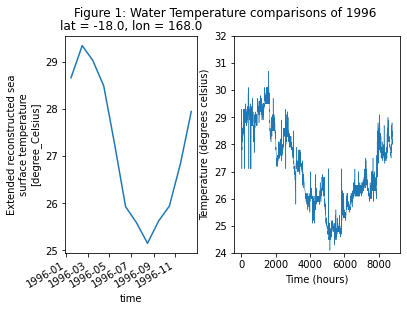

In [85]:
plt.suptitle('Figure 1: Water Temperature comparisons of 1996 ')
plt.subplot(1,20,(1,8))
t1996 = ['1996-01-15', '1996-12-15'];
sst.sel(time= slice(t1996[0],t1996[1]),lat=-18,lon=168).plot()
plt.subplot(1,20,(11,20))
TableA1996['watertemp'].plot(linewidth = 0.5) 
plt.ylim([24,32]) ;
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees celsius)')

Text(0, 0.5, 'Temperature (degrees celsius)')

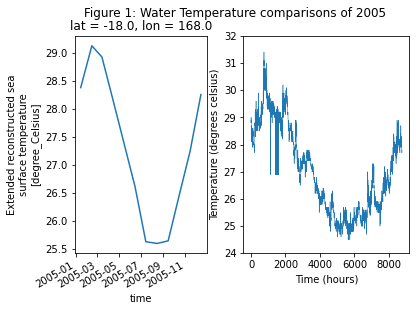

In [82]:
#plot SST at Vanuatu for a few different years against water temp from insitu 
#set time i want to check 
plt.suptitle('Figure 1: Water Temperature comparisons of 2005 ')
plt.subplot(1,20,(1,8))
t2005 = ['2005-01-15', '2005-12-15'];
sst.sel(time= slice(t2005[0],t2005[1]),lat=-18,lon=168).plot()
plt.subplot(1,20,(11,20))
TableA2005['watertemp'].plot(linewidth = 0.5) 
plt.ylim([24,32]) ;
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees celsius)')

Text(0, 0.5, 'Temperature (degrees celsius)')

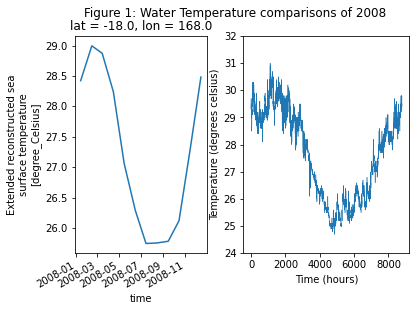

In [72]:
plt.suptitle('Figure 1: Water Temperature comparisons of 2008 ')
plt.subplot(1,20,(1,8))
t2008 = ['2008-01-15', '2008-12-15'];
sst.sel(time= slice(t2008[0],t2008[1]),lat=-18,lon=168).plot()
plt.subplot(1,20,(11,20))
TableA2008['watertemp'].plot(linewidth = 0.5) 
plt.ylim([24,32]) ;
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees celsius)')

Text(0, 0.5, 'Temperature (degrees celsius)')

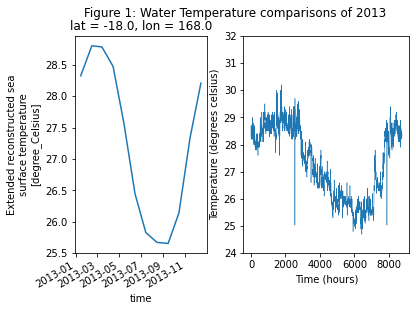

In [73]:
plt.suptitle('Figure 1: Water Temperature comparisons of 2013 ')
plt.subplot(1,20,(1,8))
t2013 = ['2013-01-15', '2013-12-15'];
sst.sel(time= slice(t2013[0],t2013[1]),lat=-18,lon=168).plot()
plt.subplot(1,20,(11,20))
TableA2013['watertemp'].plot(linewidth = 0.5) 
plt.ylim([24,32]);
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees celsius)')

Text(0, 0.5, 'Temperature (degrees celsius)')

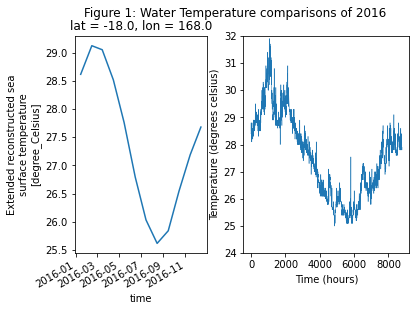

In [84]:
plt.suptitle('Figure 1: Water Temperature comparisons of 2016 ')
plt.subplot(1,20,(1,8))
t2016 = ['2016-01-15', '2016-12-15'];
sst.sel(time= slice(t2016[0],t2016[1]),lat=-18,lon=168).plot()
plt.subplot(1,20,(11,20))
TableA2016['watertemp'].plot(linewidth = 0.5) 
plt.ylim([24,32]) 
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (degrees celsius)')

**Analysis**

By comparing the different years visually we can see that the same pattern emerges which is the seasonal influence. If we look in particular at 1996 and 2016.

1996: the summer temperature max is noted as 29.3 and the winter temp min was averaged as 25.3. Looking at the hourly insitu data we have a range of 31 to 28 in summer and 24 to 26 in winter. If we average these we are on par with the SST data. 

2016: The summer max is 29.1 and the winter minimum is 25.5. The in-situ data shows a range of 28 to 32 for summer and 25 to 27 in winter. 

Data Provence is the documentation of where a piece of data comes from and the processes and methodology by which it was produced. We know that the in-situ data is an hourly observation recorded between midnight on the 1st of January of each year til the 31st of Dec. Therefore providing over 8760 observations of water temperature in degrees celsius. On the other hand the SST data is from the Physical Sciences Labortory and is a global monthly sea surface temperature dataset derived from the International Comprehensive Ocean-Atmosphere Dataset.It is the temperature inferred at the sea surface in degrees celsius averaged for each month. It is produced on a 2 degree latitude by 2 degree longitude grid. The SST comes from multiple previous datsets including ;	In situ data: ICOADS2.5 before 2007, NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2015 and NCEP ice after 2015. 

1.2. Compute 2D (latitude, longitude, time) PCs of the 2D SST over a region centred (latitudinally) on the equator and comfortably encompassing your chosen in situ tide gauge location. 

Principal Component Analysis (PCA) is the general name for a technique which uses sophisticated underlying mathematical principles to transform a number of possibly correlated variables into a smaller number of variables called principal components.

To be able to do this we first have to standardise, to do this we need to do harmonic analysis to get rid off the seasonal cycle as this will influence the analysis. We set the longitude to 168 which is where Vanuatu is, we also slice the latitude from -26 to 26 as we want it centered around the equator and its at -17.7 so this should show it comfortably. We use 26 as the grid is 2 degrees x 2 degrees so for an appropriate analysis we have to have the numbers even for latitude.  

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(57, 27)

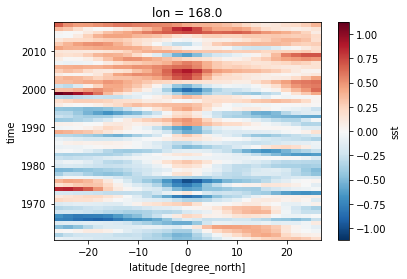

In [27]:
# Compute the mean over 'time'
sst_mean = sst.mean(dim='time')
# Compute the annual average and subtract the mean to get the annual anomaly
sst_annual_anom = sst.resample(time='A').mean(dim='time')-sst_mean   #A = annual
# Now take the equatorial slice
eqslc1 = [-26,26];
eq_sst_an_anom = sst_annual_anom.sel(lon=168,lat=slice(eqslc1[0],eqslc1[1]))
# Plot it
eq_sst_an_anom.plot()
eq_sst_an_anom.shape

The above shows that over the years we have groups of warmer temperatures and groups of cooler temperatures. This can be attributed to the ENSO influence. ENSO is the El Nino-Southern Osciallation which is a recurring climate pattern involving changes in the temperature of waters in the central and eastern tropical Pacific Ocean. If we shape it, its 57 years and 27 different latitudes.

Therefore we could find 27 Principle components, which would be a single time series with 57 points in it. For this analysis we will compute the first couple only. 

We want to compute the covariance matrix. We use the Numpy function for this, insuring that we set the correct dimensions to sum over. Then we can compute the eigenvalues and eigenvectors. Eigenvalues are the special set of scalar values that is associated with the set of linear equations in the matrix. The eigenvector is a non zero vector whose direction remains unchanged when a linear transformation is applied to it. Eigenvectors and values exist in pairs: every eigenvector has a corresponding eigenvalue. 

Put simply :

*The Eigenvector is the direction of that line, while the eigenvalue is a number that tells us how the data set is spread out on the line which is an Eigenvector.*

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([1.31456427, 0.97459   , 0.34369723, 0.11066204, 0.06046401,
       0.02419954, 0.00985352, 0.00541542, 0.00384469, 0.00246023])

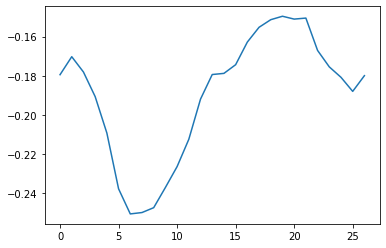

In [28]:
# Compute the covariance of the equatorial Pacific SST
cov_eq_sst = np.cov(eq_sst_an_anom,rowvar=False)  #making sure the orientation of the matrix is appropriate
# Compute the eigenvalues and eigenvectors
lam , E =np.linalg.eig(cov_eq_sst)
#Plot e1 and show 1st 10 eigenvalues 
plt.plot(E[:,0])      
np.real(lam[0:10])      
# if we multiple the below curve by the temp data and summing it we produce the first Principle component

From the above values we can see that after the first 2 eigenvalues it drops off significantly, there is also another large drop from the 3rd to the 4th so we can determine that we will not loose too much if we only compute the first 2 PCs. 

So the eigenvectors of the covariance matrix identify the direction of greatest co-variance in our data and the eigenvalues identify the magnitude of that co-variance.

We multiple the above curve by the temp data and then sum it we produce the first Principle component

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


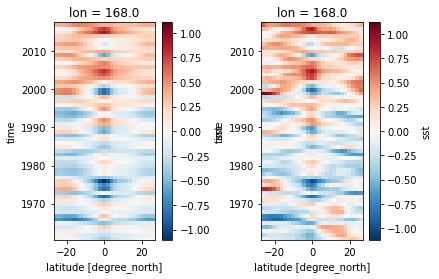

In [31]:
e1 = np.real(E[:,0])*eq_sst_an_anom # first eigenvector by the data 
u1 = e1.sum(dim= 'lat') # sum the above
x_PCA1 = np.real(E[:,0])*(1+0*eq_sst_an_anom)*u1
x_PCA1.plot()  #first principle component - shows a time series

e2 = np.real(E[:,1])*eq_sst_an_anom  #computed 2nd PC's
u2 = e2.sum(dim='lat')
x_PCA2 = np.real(E[:,1])*(1+0*eq_sst_an_anom)*u2

PCS3 = x_PCA1+x_PCA2  #summed both of the PC's
plt.subplot(1,5,(1,2))
PCS3.plot()
plt.subplot(1,5,(4,5))
eq_sst_an_anom.plot()

The above graph shows that for a set longitude of 168 degrees and 2D array of time and latitude, using the combination of 2 PC's we get an appropriate summary of the SST data for our chosen location. This is to be expected as there are as many principal components as there are variables in the data. Principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set.  



1.3. Describe the SST time series with a truncated set of PCs. Take this simplified description of the 2D SST field as a hypothetical 'forecast model' (much like the Numerical Weather Prediction models described in Wilks) and develop a forecast system to predict the in situ sea water temperature on annual timescales at your chosen tide gauge location based on the 'predictions' of the simplified SST model. (I.e. would knowing future time series of the first few PCs and their relevant eigenvalues/patterns allow you to predict local sea water temperature at your location?)

Proposed outline for this part is as follows:

- develop the truncated set of PC's, the PCs from part two can also be utilised for this. We will be limiting the time from between 1960 till 2010 so we have data from 2011-2016 to test it on. 
- using multiple linear regression to develop the forecast system, we will set the problem up in matrix form and using numpy's linalg package's lsqlin function to compute
- Complete a ANOVA analysis (Analysis of Variance) on the data over time versus the test data from years 2011-2016. We want to use these answers to calulate the R squared value to determine if it is a good fit. Another way of doing this is the mean square of the resudials or MSE. 
- discuss and analyse results, touching on the point of knowing future time series of the first few PCs and their relevant eigenvalues/patterns and if this allows for an accurate prediction of the SST at Vanuatu. 